In [ ]:
import numpy as np 
import random as rand
import math as math
import tensorflow as tf
from tensorflow import keras
from keras import layers 
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [ ]:
## PARAMETERS
num_classes = 10                       # number of output classes in your static classification problem

# TRAINING PARAMETERS

loss_func = "categorical_crossentropy" # loss function
optimization_func = 'adam'             #optimization function
list_of_metrics = ['accuracy']  
patience = 10

#load data
# packaging it all into a function
def get_fashion_data():
  import matplotlib.pyplot as plt
  import random as rand
  import numpy as np
  from tensorflow import keras 
  (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
  print("\nx_train shape:", x_train.shape, " -- y_train shape", y_train.shape)
  print("x_test shape", x_test.shape, " -- y_test shape", y_test.shape)
  mean_mat = np.mean(x_train, axis=0)
  # centering the data by removing the pixel wise mean from every pixel in every image
  x_train_centered = x_train - mean_mat
  x_test_centered = x_test - mean_mat
  # normalizing the grayscale values to values in interval [0,1]
  x_train_normalized = x_train_centered/255.0
  x_test_normalized = x_test_centered/255.0
  
  # plotting all these data manipulations for two pixels in the middle image whose values vary greatly
  # we pick 400 random images to not overcrowd the plot
  indices = rand.sample(range(60000), 400)
  fig, ax = plt.subplots()
  ax.scatter(x_train[indices,14,14], x_train[indices,14,15], c='r', label="raw", marker='x')
  ax.scatter(x_train_centered[indices,14,14], x_train_centered[indices,14,15], c='g', label='centered', marker='v')
  ax.scatter(x_train_normalized[indices,14,14], x_train_normalized[indices,14,15], c='b', label='normalized', marker='^')
  ax.legend()
  ax.grid(True)
  plt.ylabel('pixel[14,14]')
  plt.xlabel('pixel[14,15]')
  plt.show()

  # Make sure images have shape (28, 28, 1)
  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1) 

  #finally, flattening the data
  # x_train = np.reshape(x_train_normalized, (60000,784))
  # x_test = np.reshape(x_test_normalized, (10000, 784))
  print("x_train shape:", x_train.shape)
  #converting the test data to one hot encodings
  y_train = keras.utils.to_categorical(y_train, num_classes=10)
  y_test = keras.utils.to_categorical(y_test, num_classes=10)

  return x_train[:10000], y_train[:10000], x_test, y_test

In [ ]:
def get_fashion_model(input_shape, num_classes):
  model = keras.Sequential()
  model.add(layers.Conv2D(64, 7, padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, 7, padding='same', activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dense(num_classes, activation = 'softmax'))
  model.build()
  opt = keras.optimizers.Adam(lr=0.0001)
  model.compile(optimizer=opt, loss=loss_func, metrics=list_of_metrics)
  model.summary()
  return model


x_train shape: (60000, 28, 28)  -- y_train shape (60000,)
x_test shape (10000, 28, 28)  -- y_test shape (10000,)


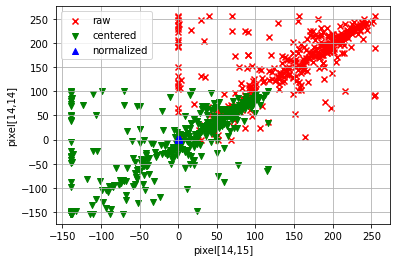

x_train shape: (60000, 28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        200768    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


266/266 [==============================] - 2s 6ms/step - loss: 13.3453 - accuracy: 0.6418 - val_loss: 0.8020 - val_accuracy: 0.7453
Epoch 2/200
266/266 [==============================] - 1s 5ms/step - loss: 0.6540 - accuracy: 0.7754 - val_loss: 0.6488 - val_accuracy: 0.7813
Epoch 3/200
266/266 [==============================] - 1s 5ms/step - loss: 0.5390 - accuracy: 0.8079 - val_loss: 0.6558 - val_accuracy: 0.7680
Epoch 4/200
266/266 [==============================] - 1s 5ms/step - loss: 0.5131 - accuracy: 0.8214 - val_loss: 0.6366 - val_accuracy: 0.7993
Epoch 5/200
266/266 [==============================] - 1s 5ms/step - loss: 0.4461 - accuracy: 0.8429 - val_loss: 0.5814 - val_accuracy: 0.8100
Epoch 6/200
266/266 [==============================] - 1s 5ms/step - loss: 0.4009 - accuracy: 0.8522 - val_loss: 0.5330 - val_accuracy: 0.8280
Epoch 7/200
266/266 [==============================] - 1s 5ms/step - loss: 0.4045 - accuracy: 0.8529 - val_loss: 0.5253 - val_accuracy: 0.8327
Epoch 8/20

In [ ]:
earlyStop = EarlyStopping(monitor = "val_accuracy", min_delta = 0.001, patience = patience, restore_best_weights = True)
x_train, y_train, x_test, y_test = get_fashion_data()
input_shape = x_train[0].shape
model = get_fashion_model(input_shape, num_classes)
model.compile(loss=loss_func, optimizer=optimization_func, metrics=list_of_metrics )
print("Patience: "+str(patience)+", batch_size: 32"+", epochs: 50"+", optimizer: "+optimization_func+", loss: "+loss_func)
model.fit(x_train, y_train, batch_size = 32, epochs = 200,  validation_split = 0.15, callbacks = earlyStop)
score = model.evaluate(x_test, y_test, verbose=0)
print("Model test loss: ", score[0])
print("Model test accuracy: ", score[1]*100)

No handles with labels found to put in legend.


[64.18, 77.53999999999999, 80.78999999999999, 82.14, 84.28999999999999, 85.22, 85.28999999999999, 86.15, 85.78, 87.66000000000001, 87.94999999999999, 87.02, 88.08, 89.67, 89.05, 89.95, 88.81, 90.31, 90.44, 92.09, 92.01, 93.0, 92.41, 92.58, 93.27, 93.32000000000001, 93.93, 94.78, 93.21000000000001, 94.67, 95.56, 95.39, 95.61, 95.67999999999999, 96.14, 94.84, 94.26, 96.02000000000001, 96.94, 97.22, 96.66, 96.26, 97.11999999999999, 96.41999999999999, 97.26, 96.6, 97.24000000000001, 96.58, 98.00999999999999, 97.67, 98.0, 98.11999999999999, 97.75] 




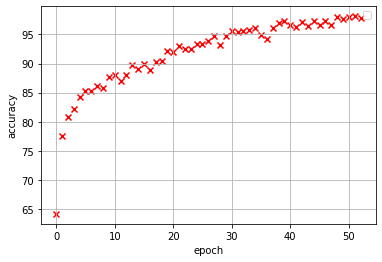

In [ ]:
batch_train_accs = [0.6418 , 0.7754 , 0.8079, 0.8214 , 0.8429 , 0.8522 , 0.8529 , 0.8615, 0.8578 , 0.8766 , 0.8795 ,0.8702, 0.8808 ,
                    0.8967 , 0.8905 ,0.8995,0.8881 ,0.9031 ,0.9044 , 0.9209 ,0.9201, 0.9300, 0.9241 , 0.9258 , 0.9327, 0.9332, 0.9393,
                    0.9478, 0.9321 , 0.9467, 0.9556,0.9539,0.9561,0.9568,0.9614, 0.9484, 0.9426,0.9602,0.9694,0.9722, 0.9666, 0.9626, 
                    0.9712, 0.9642, 0.9726,0.9660,0.9724,0.9658,0.9801,0.9767,0.9800,0.9812,0.9775]
for i in range(len(batch_train_accs)):
  batch_train_accs[i] = batch_train_accs[i]*100.0
print(batch_train_accs, "\n\n")
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(range(len(batch_train_accs)), batch_train_accs, c='r', marker='x')
ax.legend()
ax.grid(True)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
!pip install keras-tuner -q
from keras_tuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()
  hp_filters = hp.Choice('filters', values=[32,64,128,256])
  hp_kernels = hp.Choice('kernels', values=[3, 5, 7])
  model.add(layers.Conv2D(hp_filters, hp_kernels, padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(hp_filters, hp_kernels, padding='same', activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dense(10, activation='softmax'))
	# compile model
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  opt = keras.optimizers.Adam(lr=hp_learning_rate)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

x_train, y_train, x_test, y_test = get_fashion_data()
tuner = RandomSearch(build_model,
                     objective= 'val_accuracy',
                     max_trials = 10,
                     executions_per_trial = 2,
                     overwrite = True,
                     directory = "/content/drive/MyDrive/VGG16Tuning",
                     project_name = "for_curricular"
                     )
tuner.search_space_summary()
tuner.search(x_train, y_train, epochs = 20, validation_data=(x_test, y_test))
models = tuner.get_best_models(num_models=2)
tuner.results_summary()

Trial 10 Complete [00h 12m 00s]
val_accuracy: 0.7454500198364258

Best val_accuracy So Far: 0.9032999873161316
Total elapsed time: 03h 04m 16s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in /content/drive/MyDrive/VGG16Tuning/for_curricular
Showing 10 best trials
Trial summary
Hyperparameters:
filters: 64
kernels: 7
learning_rate: 0.0001
Score: 0.9032999873161316
Trial summary
Hyperparameters:
filters: 32
kernels: 3
learning_rate: 0.001
Score: 0.9027000069618225
Trial summary
Hyperparameters:
filters: 64
kernels: 5
learning_rate: 0.001
Score: 0.9025000035762787
Trial summary
Hyperparameters:
filters: 64
kernels: 3
learning_rate: 0.0001
Score: 0.9009499847888947
Trial summary
Hyperparameters:
filters: 32
kernels: 5
learning_rate: 0.0001
Score: 0.8985500037670135
Trial summary
Hyperparameters:
filters: 32
kernels: 5
learning_rate: 0.001
Score: 0.8977499902248383
Trial summary
Hyperparameters:
filters: 256
kernels: 3
learning_rate: 0.001
Score: 0.8944999873638153
Trial su

#Results from above tuning process:
Trial 10 Complete [00h 18m 45s]
val_accuracy: 0.9093999862670898

__Best val_accuracy So Far: 0.9093999862670898__
Total elapsed time: 02h 24m 50s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in /content/drive/MyDrive/VGG16Tuning/for_curricular
Showing 10 best trials
<keras_tuner.engine.objective.Objective object at 0x7fb10ec1f610>
#Trial summary
__Hyperparameters:  
filters: 128  
learning_rate: 0.0001  
Score: 0.9093999862670898__  
Trial summary  
Hyperparameters:  
filters: 32  
learning_rate: 0.001  
Score: 0.90625  
Trial summary  
Hyperparameters:  
filters: 256  
learning_rate: 0.0001  
Score: 0.9039499759674072  
Trial summary  
Hyperparameters:  
filters: 64  
learning_rate: 0.0001  
Score: 0.9020500183105469  
Trial summary  
Hyperparameters:  
filters: 32  
learning_rate: 0.0001  
Score: 0.8930500149726868  
Trial summary  
Hyperparameters:  
filters: 16  
learning_rate: 0.01  
Score: 0.8208999931812286  
Trial summary  
Hyperparameters:  
filters: 32  
learning_rate: 0.01  
Score: 0.710099995136261  
Trial summary  
Hyperparameters:  
filters: 128  
learning_rate: 0.01  
Score: 0.6441499888896942  
Trial summary  
Hyperparameters:  
filters: 256  
learning_rate: 0.01  
Score: 0.5717499852180481  
Trial summary  
Hyperparameters:  
filters: 64  
learning_rate: 0.01  
Score: 0.4063500054180622